In [1]:
import tp3
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv('../data/synthData.csv',usecols=['Y', 'X1', 'X2'])


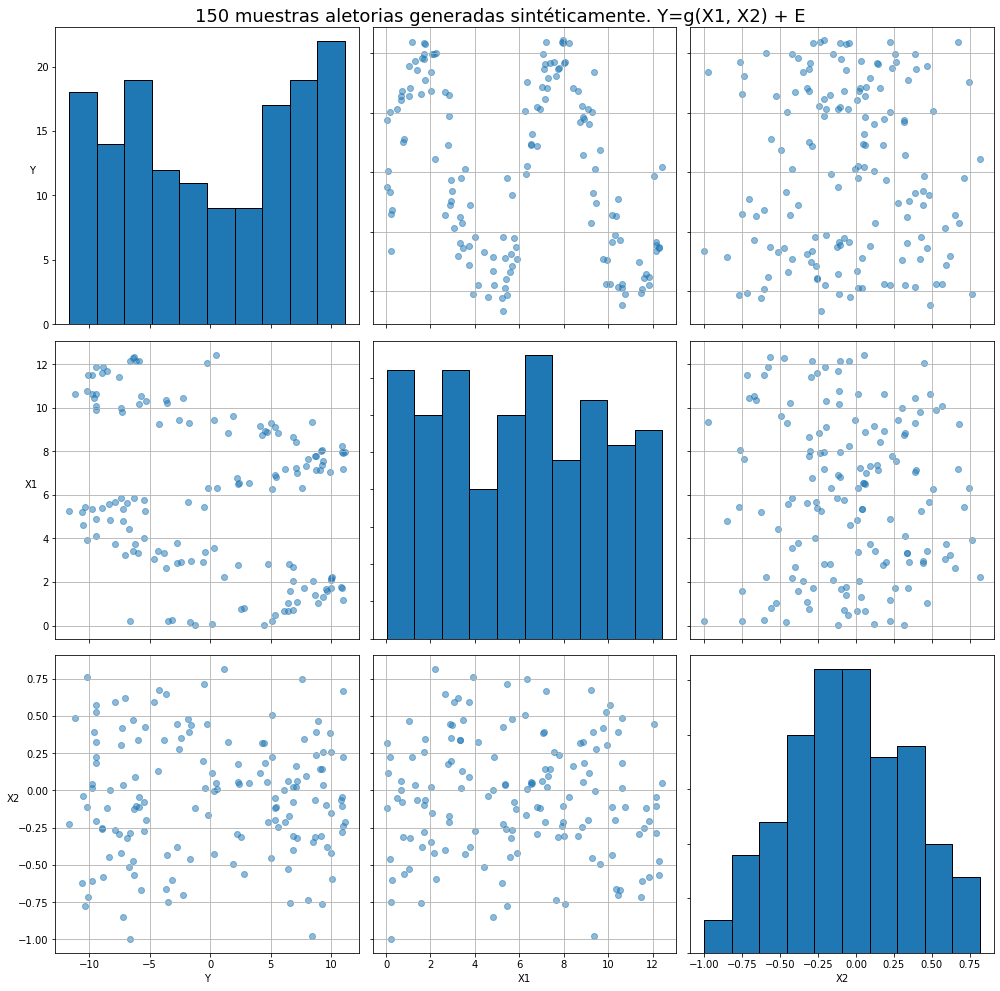

In [18]:
Y = data['Y']
X1 = data['X1']
X2 = data['X2']

figure, axis = plt.subplots(3, 3, figsize=(14, 14))
figure.suptitle('150 muestras aletorias generadas sintéticamente. Y=g(X1, X2) + E', fontsize=18 )

axis[0, 0].hist(Y, 10, edgecolor='k')
axis[0, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 0].set_ylabel('Y', rotation=0)

axis[0, 1].scatter(X1, Y, alpha=0.5)
axis[0, 1].grid(True)
axis[0, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 1].tick_params(axis='y', which='both', labelleft=False)

axis[0, 2].scatter(X2, Y, alpha=0.5)
axis[0, 2].grid(True)
axis[0, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 2].tick_params(axis='y', which='both', labelleft=False)

#
axis[1, 0].scatter(Y, X1, alpha=0.5)
axis[1, 0].grid(True)
axis[1, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 0].set_ylabel('X1', rotation=0)

axis[1, 1].hist(X1, 10, edgecolor='k')
axis[1, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 1].tick_params(axis='y', which='both', labelleft=False)

axis[1, 2].scatter(X2, X1, alpha=0.5)
axis[1, 2].grid(True)
axis[1, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 2].tick_params(axis='y', which='both', labelleft=False)

#
axis[2, 0].scatter(Y, X2, alpha=0.5)
axis[2, 0].grid(True)
axis[2, 0].set_ylabel('X2', rotation=0)
axis[2, 0].set_xlabel('Y', rotation=0)

axis[2, 1].scatter(X1, X2, alpha=0.5)
axis[2, 1].grid(True)
axis[2, 1].tick_params(axis='y', which='both', labelleft=False)
axis[2, 1].set_xlabel('X1', rotation=0)

axis[2, 2].hist(X2, 10, edgecolor='k')
axis[2, 2].tick_params(axis='y', which='both', labelleft=False)
axis[2, 2].set_xlabel('X2', rotation=0)

plt.tight_layout()
plt.show()

In [4]:
def estimate(f, degree, dist):
    x = data[['X1', 'X2']].to_numpy()
    y = data['Y'].to_numpy()

    estimates = tp3.loess(x, y, x, f, degree, dist)
    return (y, estimates)

In [5]:
def probplot(estimates, residuals, param_f, poly_degree, param_dist):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    plt.tight_layout()
    res = stats.probplot(residuals, plot=plt, fit=True)

    metodo = 'linear regression' if poly_degree == 1 else 'quadratic regression'
    axs[1].get_lines()[0].set_marker('o')
    axs[1].get_lines()[0].set_alpha(0.5)
    axs[1].set_ylabel('Residuals')
    axs[1].grid(True)
    axs[1].set_title(f'Probability Plot: {metodo}, f = {param_f}, dist=norm{param_dist}')

    abs_res_f = 0.6
    abs_res= np.abs(residuals)
    to_est = estimates.reshape((len(estimates),1))
    abs_res_est = tp3.loess(to_est, abs_res, to_est, f=abs_res_f, fit=poly_degree, dist=param_dist, normalize=False)

    order_estimates = np.argsort(estimates)

    axs[0].scatter(estimates, abs_res, alpha=0.5)
    axs[0].plot(estimates[order_estimates], abs_res_est[order_estimates], color='red')
    axs[0].set_xlabel('Fitted Values')
    axs[0].set_ylabel('Abs Residuals')
    axs[0].grid(True)
    axs[0].set_title(f'{metodo}, f = {abs_res_f}, dist=norm{param_dist}')

In [6]:
def plot_prob(ax, residuals, param_f, poly_degree, param_dist):
    res = stats.probplot(residuals, plot=ax, fit=True)

    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_alpha(0.5)
    ax.set_ylabel('')
    ax.grid(True)
    ax.set_title(f'f = {param_f}')


In [7]:
def get_residuals(f, degree, dist):
    estimates, y = estimate(f, degree, dist)
    return y - estimates

Text(0, 0.5, 'Residuals')

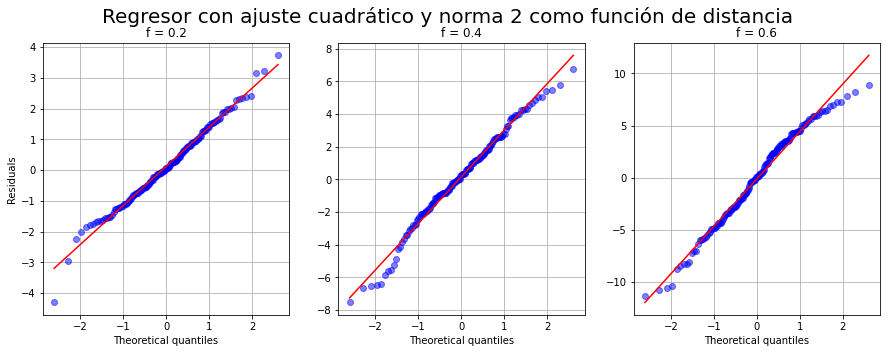

In [8]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

fig.suptitle('Regresor con ajuste cuadrático y norma 2 como función de distancia', fontsize=20)
plot_prob(axs[0], get_residuals(0.2, 2, 2), 0.2, 2, 2)
plot_prob(axs[1], get_residuals(0.4, 2, 2), 0.4, 2, 2)
plot_prob(axs[2], get_residuals(0.6, 2, 2), 0.6, 2, 2)
axs[0].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

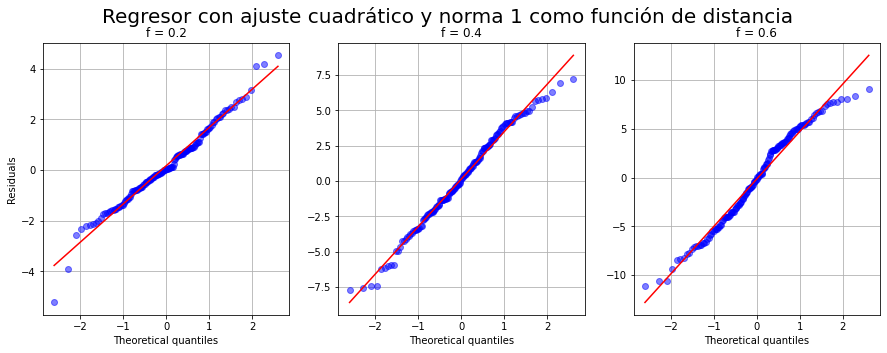

In [9]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

fig.suptitle('Regresor con ajuste cuadrático y norma 1 como función de distancia', fontsize=20)
plot_prob(axs[0], get_residuals(0.2, 2, 1), 0.2, 2, 1)
plot_prob(axs[1], get_residuals(0.4, 2, 1), 0.4, 2, 1)
plot_prob(axs[2], get_residuals(0.6, 2, 1), 0.6, 2, 1)
axs[0].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

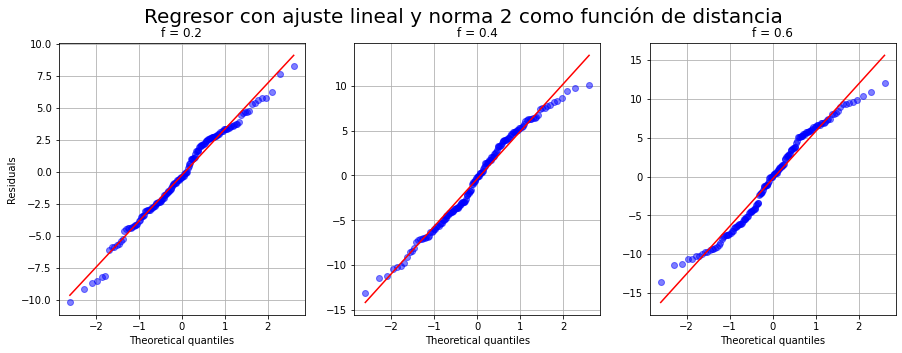

In [10]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

fig.suptitle('Regresor con ajuste lineal y norma 2 como función de distancia', fontsize=20)
plot_prob(axs[0], get_residuals(0.2, 1, 2), 0.2, 1, 2)
plot_prob(axs[1], get_residuals(0.4, 1, 2), 0.4, 1, 2)
plot_prob(axs[2], get_residuals(0.6, 1, 2), 0.6, 1, 2)
axs[0].set_ylabel('Residuals')

In [11]:
def plot_abs_residuals(ax, y, estimates, f, poly_degree, param_dist, abs_res_f):
    residuals = y - estimates
    metodo = 'linear regression' if poly_degree == 1 else 'quadratic regression'

    # abs_res_f = 0.6
    abs_res= np.abs(residuals)
    to_est = estimates.reshape((len(estimates),1))
    abs_res_est = tp3.loess(to_est, abs_res, to_est, f=abs_res_f, fit=poly_degree, dist=param_dist, normalize=False)

    order_estimates = np.argsort(estimates)

    ax.scatter(estimates, abs_res, alpha=0.5)
    ax.plot(estimates[order_estimates], abs_res_est[order_estimates], color='red')
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('')
    ax.grid(True)
    ax.set_title(f'f = {f}')

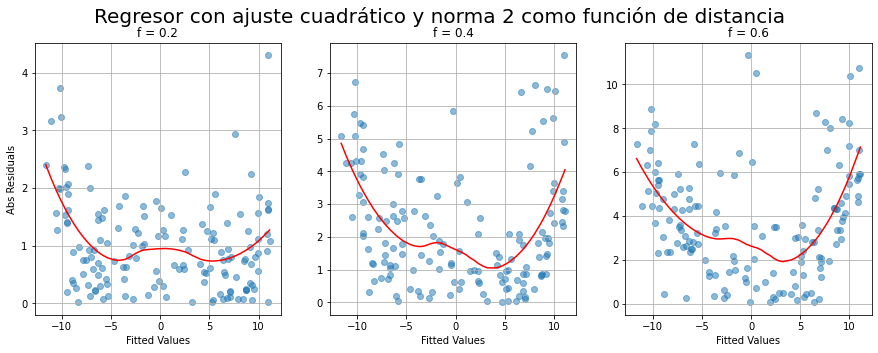

In [12]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

abs_res_f = 0.7

fig.suptitle('Regresor con ajuste cuadrático y norma 2 como función de distancia', fontsize=20)

estimates, y = estimate(0.2, 2, 2)
plot_abs_residuals(axs[0], y, estimates, 0.2, 2, 2, abs_res_f)
axs[0].set_ylabel('Abs Residuals')

estimates, y = estimate(0.4, 2, 2)
plot_abs_residuals(axs[1], y, estimates, 0.4, 2, 2, abs_res_f)

estimates, y = estimate(0.6, 2, 2)
plot_abs_residuals(axs[2], y, estimates, 0.6, 2, 2, abs_res_f)


In [13]:
def plot_residuals(residuals, f, degree, dist):
    cols = ['X1','X2']

    fig, axs = plt.subplots(1, len(cols), figsize=(15,5))
    fig.suptitle(f'Regresor con ajuste lineal y norma 2 como función de distancia.', fontsize=20)

    plt.tight_layout()
    axs[0].set_ylabel('Residuals')
    #axs[1].tick_params(axis='y', which='both', labelleft=False)
    #axs[2].tick_params(axis='y', which='both', labelleft=False)

    for i in range(len(cols)):
        x = data[[cols[i]]].to_numpy()
        res_est = tp3.loess(x, residuals, x, f, fit=degree, dist=dist, normalize=False)
        order = np.argsort(x.T[0])

        axs[i].scatter(x, residuals, alpha=0.5)
        axs[i].plot(x[order], res_est[order], color='red')
        axs[i].set_xlabel(cols[i])
        axs[i].grid(True)

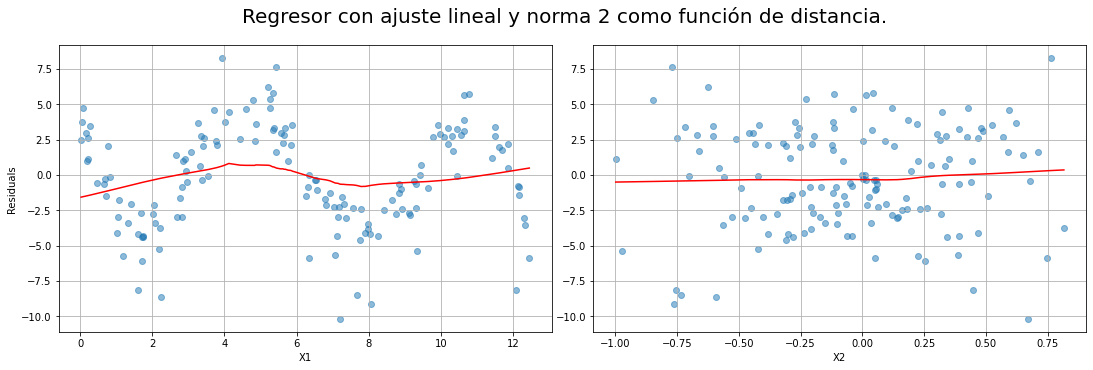

In [14]:
estimates, y = estimate(0.2, 1, 2)

# plot_residuals(y - estimates, 0.7, 2, 2)
plot_residuals(y - estimates, 0.7, 1, 2)

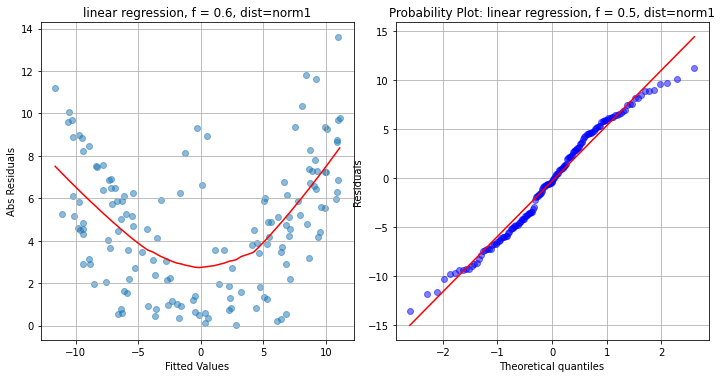

In [15]:
estimates, y = estimate(0.5, 1, 1)
residuals = y - estimates
probplot(estimates, residuals, 0.5, 1, 1)

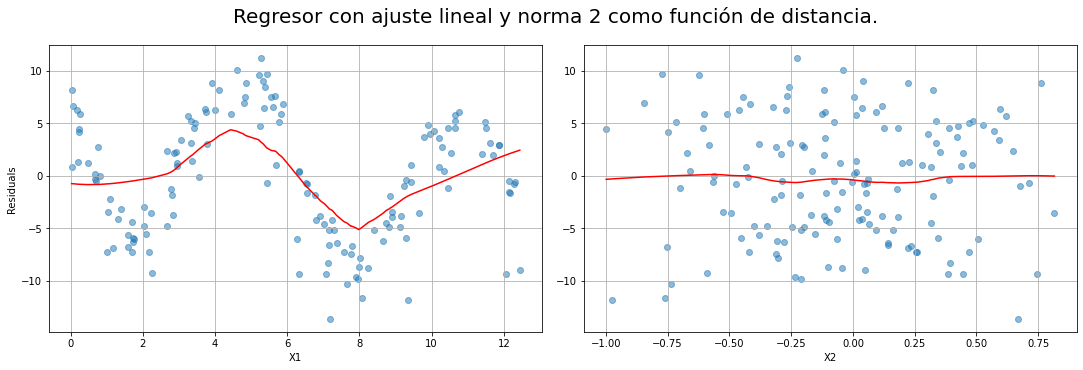

In [16]:
plot_residuals(residuals, 0.5, 1, 1)